<a href="https://colab.research.google.com/github/Sabari2401/InsuranceData-AnalysticsProject/blob/main/Insurance_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

df=pd.read_csv('https://raw.githubusercontent.com/GuviMentor88/Training-Datasets/main/insurance_dataset.csv')
df.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,Outcome
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,no
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,no


In [ ]:
df.shape

(45211, 11)

Handling missing value

In [ ]:
df.isnull().sum()

,0
age,0
job,0
marital,0
education_qual,0
call_type,0
day,0
mon,0
dur,0
num_calls,0
prev_outcome,0


Duplicate values

In [ ]:
duplicates=df[df.duplicated()]
duplicates

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,Outcome
6893,34,services,married,secondary,unknown,28,may,124,1,unknown,no
8138,29,admin.,single,secondary,unknown,2,jun,121,4,unknown,no
11630,39,blue-collar,married,primary,unknown,19,jun,112,4,unknown,no
13400,36,blue-collar,married,secondary,cellular,9,jul,183,1,unknown,no
19826,36,management,married,tertiary,cellular,8,aug,75,2,unknown,no
19854,32,technician,single,tertiary,cellular,8,aug,31,2,unknown,no


Removing duplicates

In [ ]:
df.drop_duplicates(inplace=True)
df.shape


(45205, 11)

outlier detection

In [ ]:
df['Outcome'].nunique()

2

<function matplotlib.pyplot.show(close=None, block=None)>

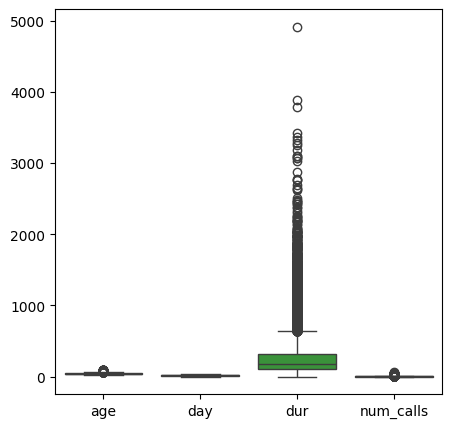

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns

plt.figure(figsize=(5,5))
sns.boxplot(data=df.select_dtypes(include=['number']))
plt.show

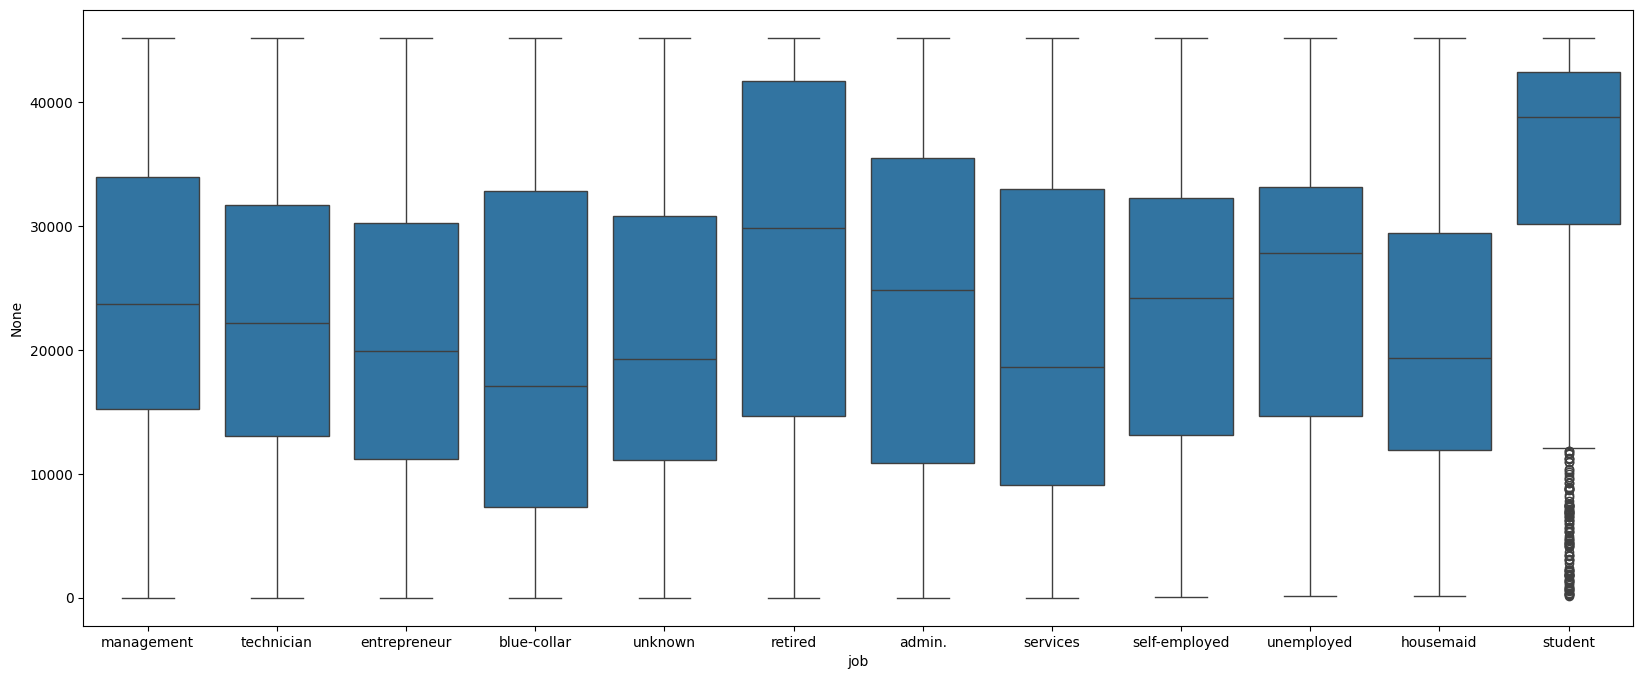

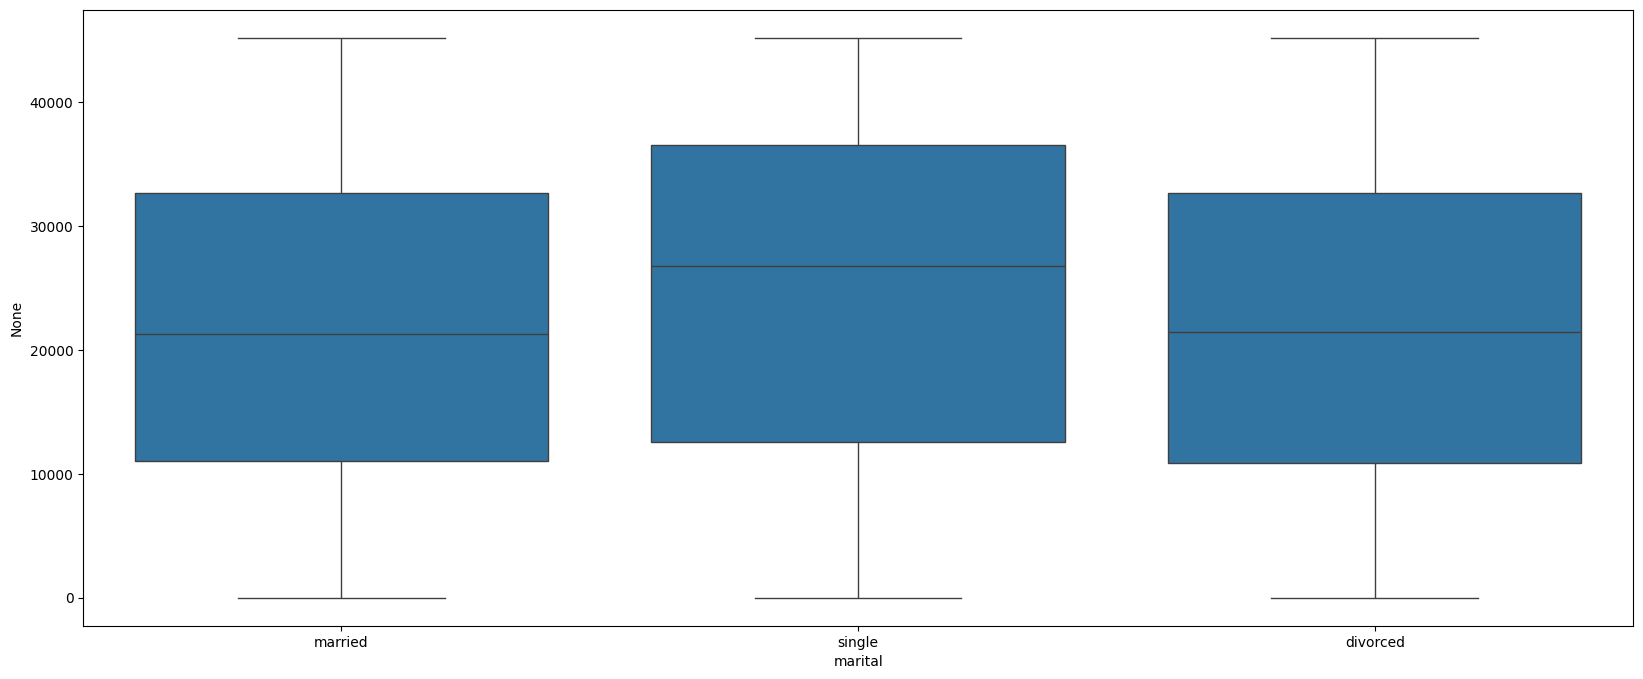

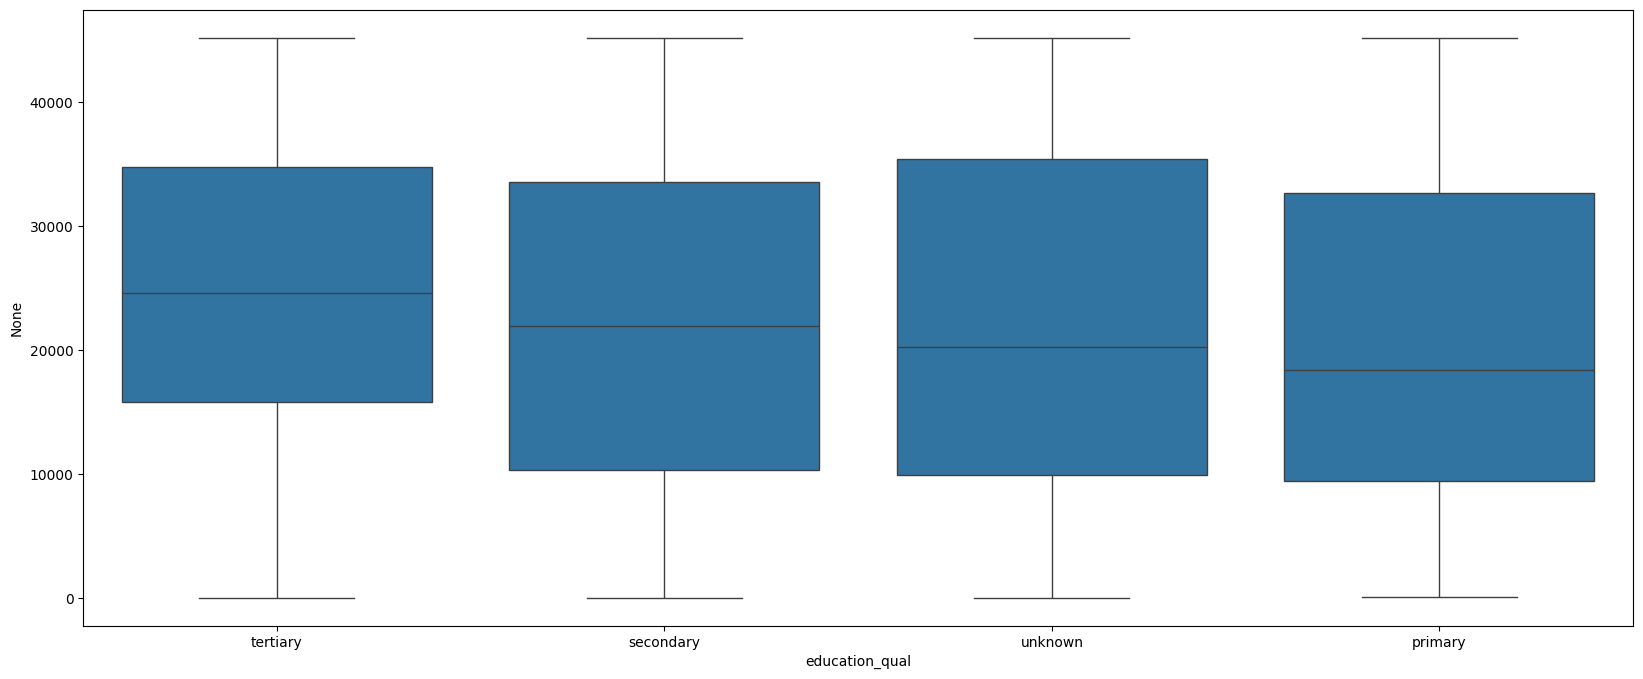

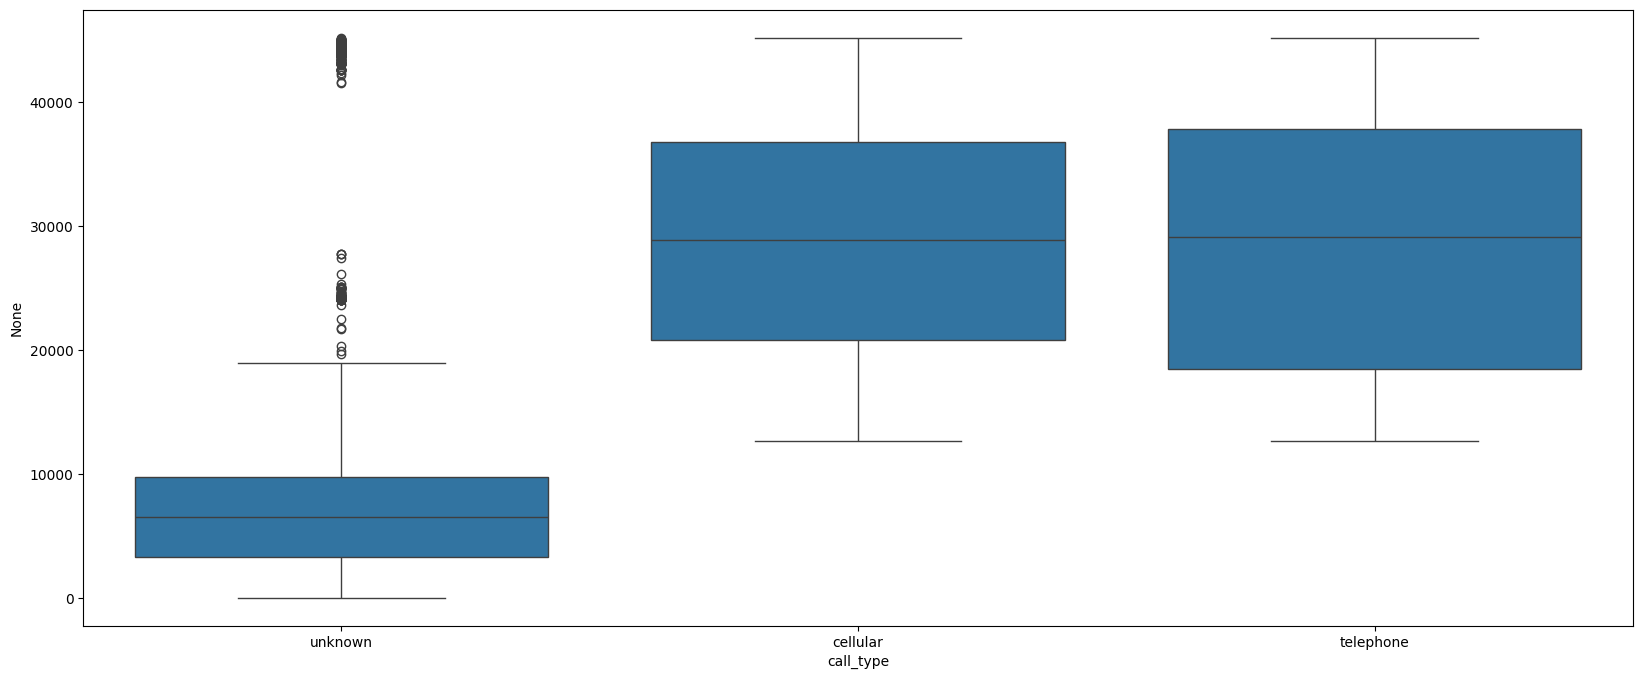

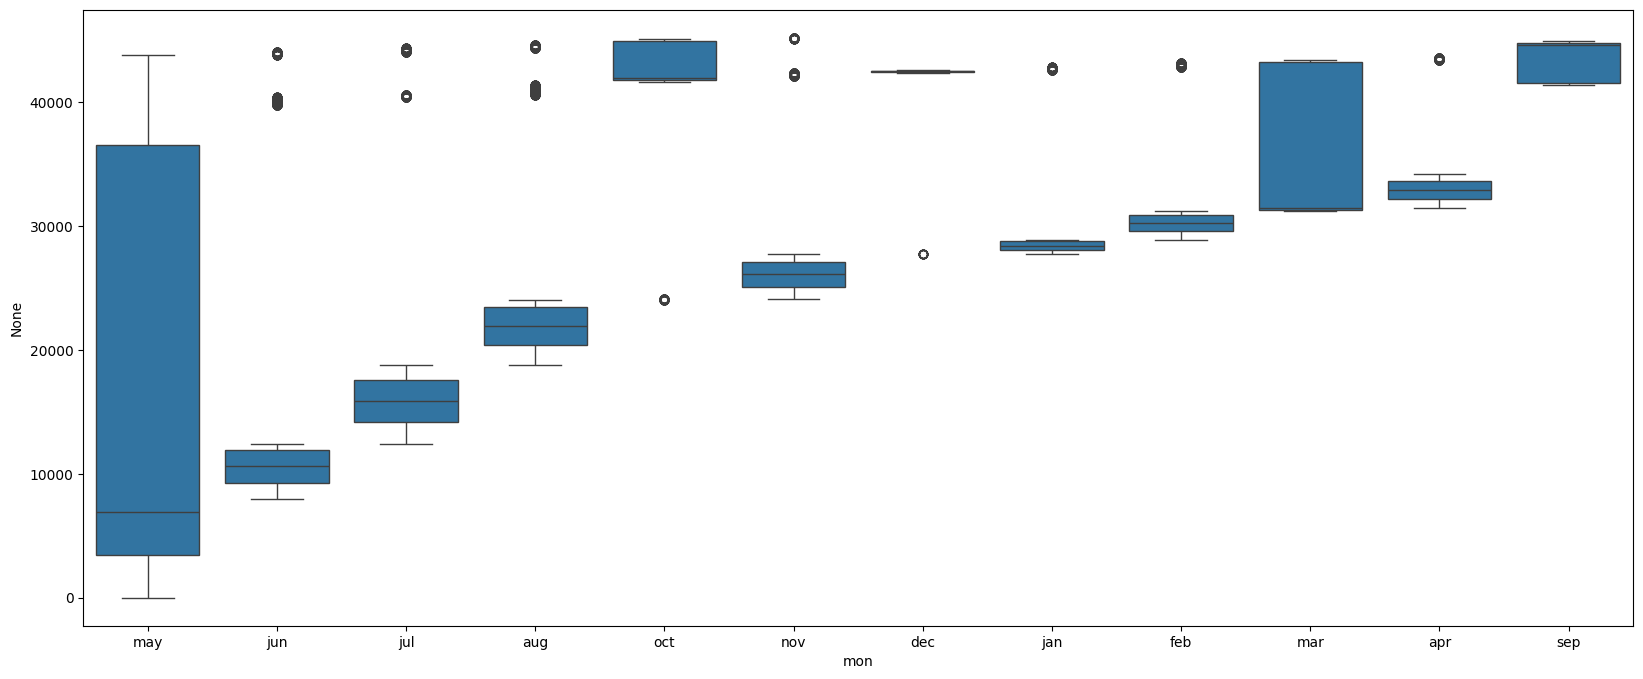

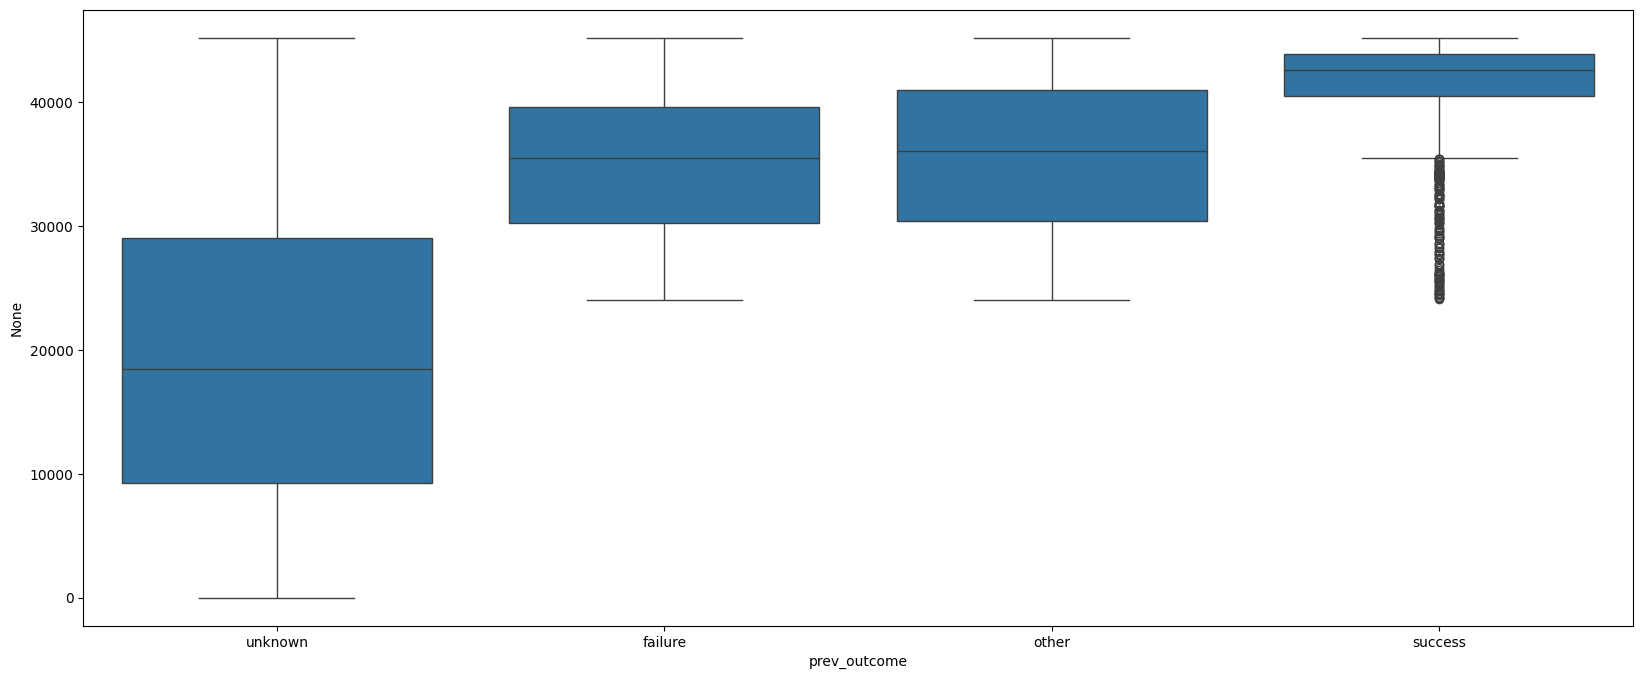

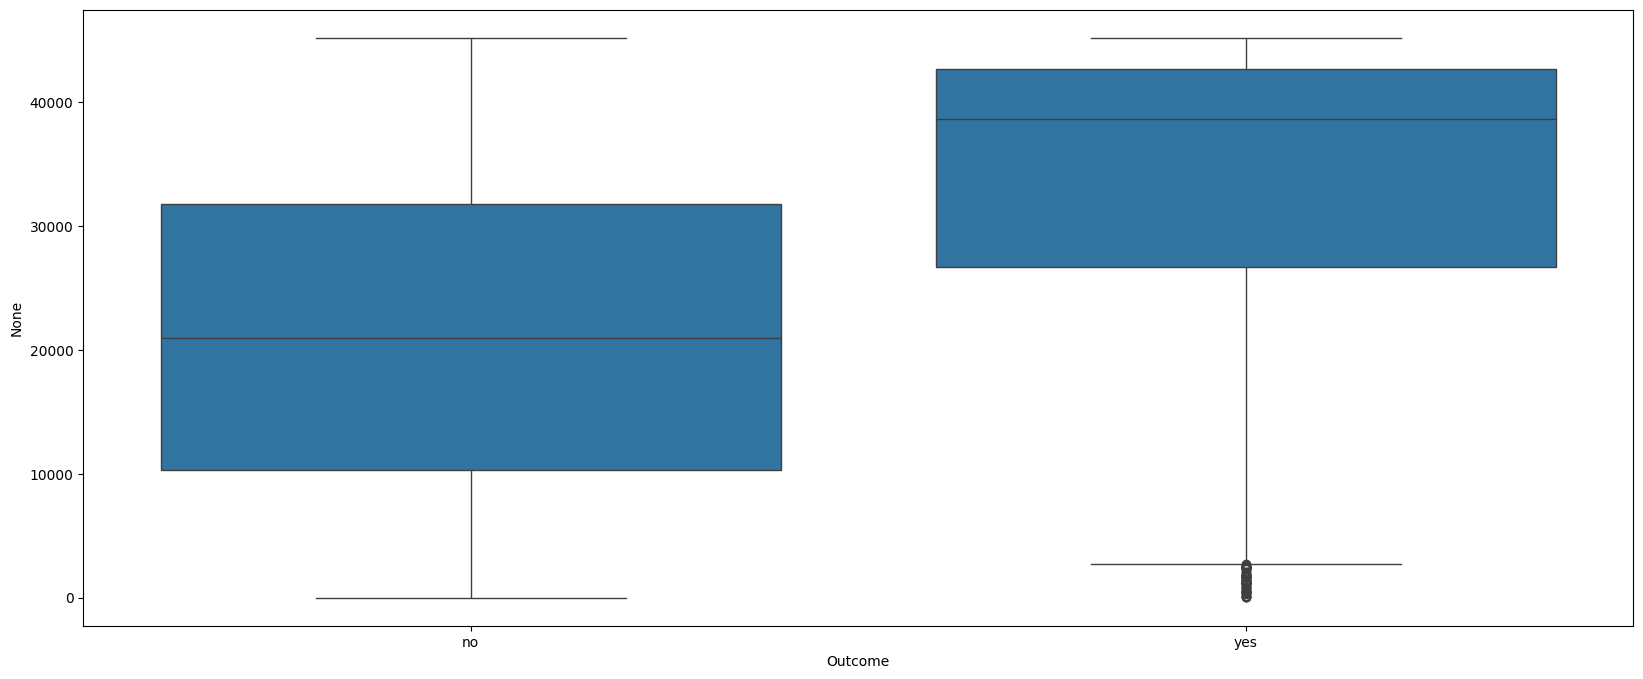

In [ ]:
column=df.columns
for col in column:
  if df[col].dtype=='object':
    plt.figure(figsize=(20,8))
    sns.boxplot(x=col,y=df[col].index, data=df)
    plt.show()


In [ ]:
df.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,Outcome
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,no
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,no


Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for col in df.columns:
  if df[col].dtypes=='object':
    df[col]=le.fit_transform(df[col])

df.head(5)


,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,Outcome
0,58,4,1,2,2,5,8,261,1,3,0
1,44,9,2,1,2,5,8,151,1,3,0
2,33,2,1,1,2,5,8,76,1,3,0
3,47,1,1,3,2,5,8,92,1,3,0
4,33,11,2,3,2,5,8,198,1,3,0


In [ ]:
df['Outcome'].value_counts()

,count
Outcome,
0,39916
1,5289


Normalization

In [ ]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(df.drop('Outcome',axis=1))
df_scaled=pd.DataFrame(scaled_data,columns=df.drop('Outcome',axis=1).columns)
df_scaled['Outcome']=df['Outcome']
df_scaled['Outcome'].value_counts()

,count
Outcome,
0.0,39914
1.0,5285


In [ ]:
df_scaled[df_scaled['Outcome'].isna()]

df_scaled.dropna(inplace=True)
df_scaled.shape

(45199, 11)

SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE
import pandas as pd

sm=SMOTE()
x=df_scaled.drop('Outcome',axis=1)
y=df_scaled['Outcome']

x_remsampled,y_resampled=sm.fit_resample(x,y)
df_cleaned=pd.concat([x_remsampled,y_resampled],axis=1)
df_cleaned.head()
df_cleaned['Outcome'].value_counts()
df=df_cleaned.copy()

df.shape
df.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,Outcome
0,0.519481,0.363636,0.5,0.666667,1.0,0.133333,0.727273,0.053070,0.0,1.0,0.0
1,0.337662,0.818182,1.0,0.333333,1.0,0.133333,0.727273,0.030704,0.0,1.0,0.0
2,0.194805,0.181818,0.5,0.333333,1.0,0.133333,0.727273,0.015453,0.0,1.0,0.0
3,0.376623,0.090909,0.5,1.000000,1.0,0.133333,0.727273,0.018707,0.0,1.0,0.0
4,0.194805,1.000000,1.0,1.000000,1.0,0.133333,0.727273,0.040260,0.0,1.0,0.0


In [ ]:
df['Outcome'].value_counts()

,count
Outcome,
0.0,39914
1.0,39914


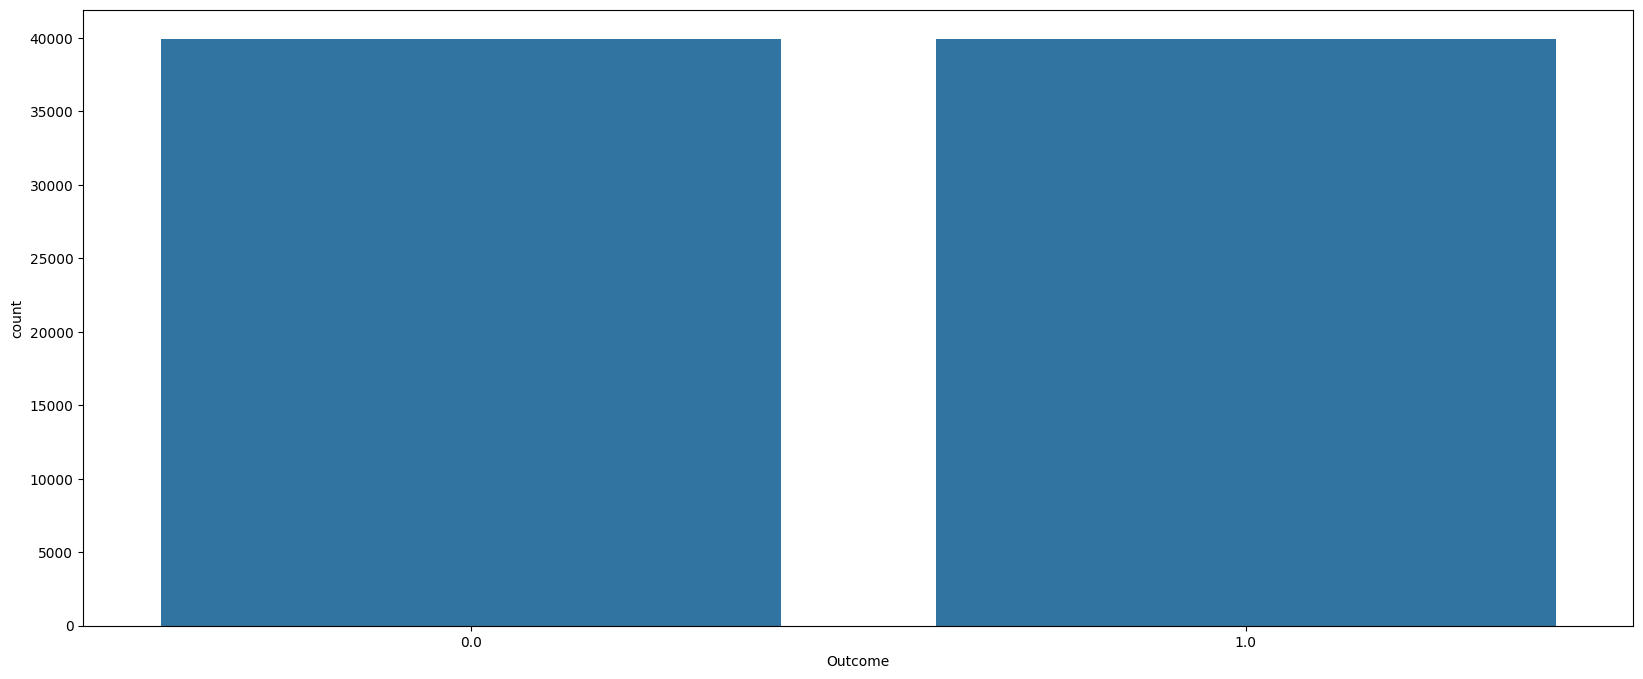

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
plt.figure(figsize=(20,8))
sns.countplot(x=df['Outcome'], data=df)
plt.show()

Removing outliers

In [ ]:
Q1 = df.drop('Outcome', axis=1).quantile(0.25)
Q3 = df.drop('Outcome', axis=1).quantile(0.75)

IQR = Q3 - Q1


lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


filtered_entries = ((df.drop('Outcome', axis=1) >= lower_bound) & (df.drop('Outcome', axis=1) <= upper_bound)).all(axis=1)

df = df.loc[filtered_entries]

# Display the value counts of the 'Outcome' column after filtering
df['Outcome'].value_counts()


,count
Outcome,
0.0,30767
1.0,28772


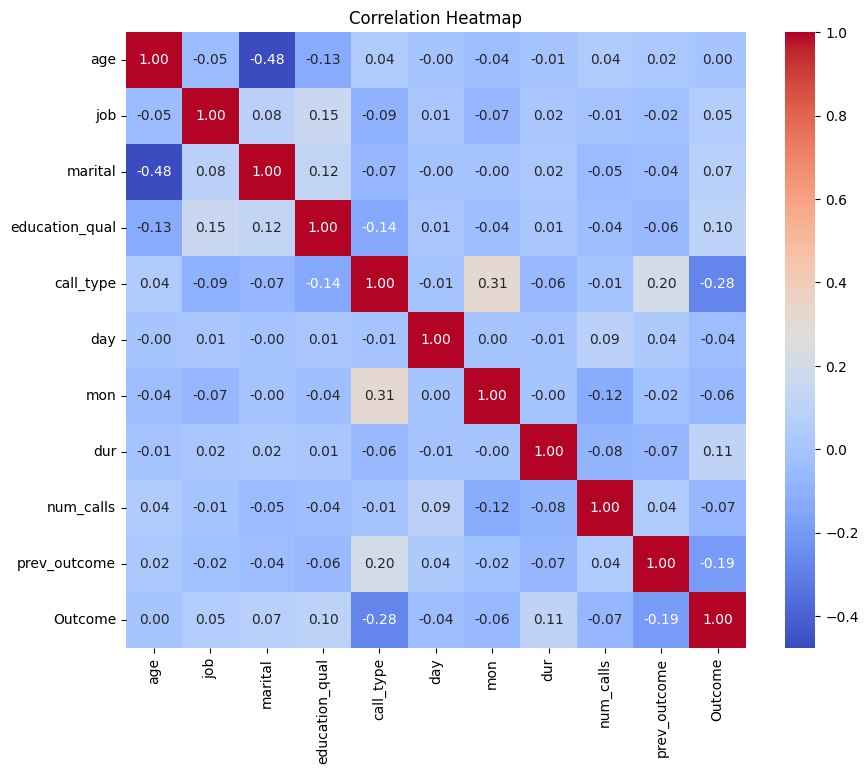

In [ ]:
correlation_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Correlation Heatmap')
plt.show()

Train test split

In [ ]:
from sklearn.model_selection import train_test_split
x=df.drop('Outcome',axis=1)
y=df['Outcome']
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.3)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)


(41677, 10)
(17862, 10)
(41677,)
(17862,)


Logistic regression

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np

le=LogisticRegression()
model=le.fit(x_train,y_train)

def predict_thr(model,x_text,thr):
  import numpy as np
  return np.where(model.predict_proba(x_text)[:,1]>thr,1,0)

max_accuracy=0
best_thresold=0

for thr in np.arange(0.1,1,0.1):
  y_pred_thr = predict_thr(model,x_test,thr)
  accuracy=accuracy_score(y_pred_thr,y_test)
  ##print(accuracy)
  if accuracy > max_accuracy:
        max_accuracy = accuracy
        best_threshold = thr

print(max_accuracy)
print(best_threshold)

prob=model.predict_proba(x_test)[:,1]
y_pred=np.where(prob>best_threshold,1,0)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))







0.641137610569925
0.5
Accuracy: 0.641137610569925
Classification Report:
               precision    recall  f1-score   support

         0.0       0.67      0.61      0.64      9284
         1.0       0.61      0.68      0.65      8578

    accuracy                           0.64     17862
   macro avg       0.64      0.64      0.64     17862
weighted avg       0.64      0.64      0.64     17862

Confusion Matrix:
 [[5624 3660]
 [2750 5828]]


KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np

x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=43,test_size=0.3)

param_grid={'n_neighbors':[2,4,6,8,10],
            'metric':['euclidean','manhattan'],
            'weights':['uniform','distance'],}


knn=KNeighborsClassifier()
grid_search=GridSearchCV(estimator=knn,cv=5,n_jobs=-1,param_grid=param_grid)
grid_search.fit(x_train,y_train)

best_params=grid_search.best_params_
print(best_params)

best_model=grid_search.best_estimator_
print(best_model)
y_pred=best_model.predict(x_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))




{'metric': 'manhattan', 'n_neighbors': 2, 'weights': 'distance'}
KNeighborsClassifier(metric='manhattan', n_neighbors=2, weights='distance')
Accuracy: 0.898611577650879
Classification Report:
               precision    recall  f1-score   support

         0.0       0.94      0.86      0.90      9284
         1.0       0.86      0.94      0.90      8578

    accuracy                           0.90     17862
   macro avg       0.90      0.90      0.90     17862
weighted avg       0.90      0.90      0.90     17862

Confusion Matrix:
 [[7964 1320]
 [ 491 8087]]


Decision tree classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


param_grid={'criterion':['gini','entropy'],
            'max_depth':[2,4,6,8,10]}
dt=DecisionTreeClassifier(random_state=42)
grid_search=GridSearchCV(estimator=dt,param_grid=param_grid,cv=5,n_jobs=-1)
grid_search.fit(x_train,y_train)

best_params=grid_search.best_params_
print(best_params)

best_model=grid_search.best_estimator_
print(best_model)

y_pred=best_model.predict(x_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

{'criterion': 'gini', 'max_depth': 10}
DecisionTreeClassifier(max_depth=10, random_state=42)
Accuracy: 0.8350128764975927
Classification Report:
               precision    recall  f1-score   support

         0.0       0.78      0.94      0.85      9186
         1.0       0.92      0.73      0.81      8676

    accuracy                           0.84     17862
   macro avg       0.85      0.83      0.83     17862
weighted avg       0.85      0.84      0.83     17862

Confusion Matrix:
 [[8602  584]
 [2363 6313]]


Random forest classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
rfc=RandomForestClassifier(random_state=43)

param_grid = {
    'n_estimators': [10, 20],  # Number of trees in the forest
    'max_depth': [ 10, 20, 30],  # Maximum depth of trees
    'bootstrap': [True, False],  # Whether to use bootstrap samples or not
}

grid_search=GridSearchCV(estimator=rfc,param_grid=param_grid,verbose=1,n_jobs=-1,cv=5)

grid_search.fit(x_train,y_train)
print("Best Hyperparameters:", grid_search.best_params_)
best_rfc_model=grid_search.best_estimator_

y_pred = best_rfc_model.predict(x_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best Hyperparameters: {'bootstrap': False, 'max_depth': 30, 'n_estimators': 20}
Accuracy: 0.9254842682790281
Classification Report:
               precision    recall  f1-score   support

         0.0       0.91      0.95      0.93      9186
         1.0       0.94      0.90      0.92      8676

    accuracy                           0.93     17862
   macro avg       0.93      0.92      0.93     17862
weighted avg       0.93      0.93      0.93     17862

Confusion Matrix:
 [[8723  463]
 [ 868 7808]]
